In [1]:
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error as mse

import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.optimizers import *
from tensorflow.keras import backend as K
from tensorflow.keras.callbacks import EarlyStopping

### Module need to create

- viz the time series missing val. 
- encoding time stamp. 
- label encoding. 

In [3]:
import os
os.getcwd()

'/content'

In [6]:
df = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')
df['date_time'] = pd.to_datetime(df['date_time'])
df.drop_duplicates('date_time', inplace = True)
df.set_index('date_time', inplace = True)
print(df.shape)
df.head()

(40575, 8)


,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume
date_time,,,,,,,,
2012-10-02 09:00:00,None,288.28,0.0,0.0,40,Clouds,scattered clouds,5545
2012-10-02 10:00:00,None,289.36,0.0,0.0,75,Clouds,broken clouds,4516
2012-10-02 11:00:00,None,289.58,0.0,0.0,90,Clouds,overcast clouds,4767
2012-10-02 12:00:00,None,290.13,0.0,0.0,90,Clouds,overcast clouds,5026
2012-10-02 13:00:00,None,291.14,0.0,0.0,75,Clouds,broken clouds,4918


In [7]:
### INSERT MISSING DATES ###

df = df.reindex(pd.date_range(df.head(1).index[0], df.tail(1).index[0], freq='H'))

df.shape

(52551, 8)

we insert missing hour and increase the sample size from 40575 to 52551

Text(0, 0.5, 'traffic_volume')

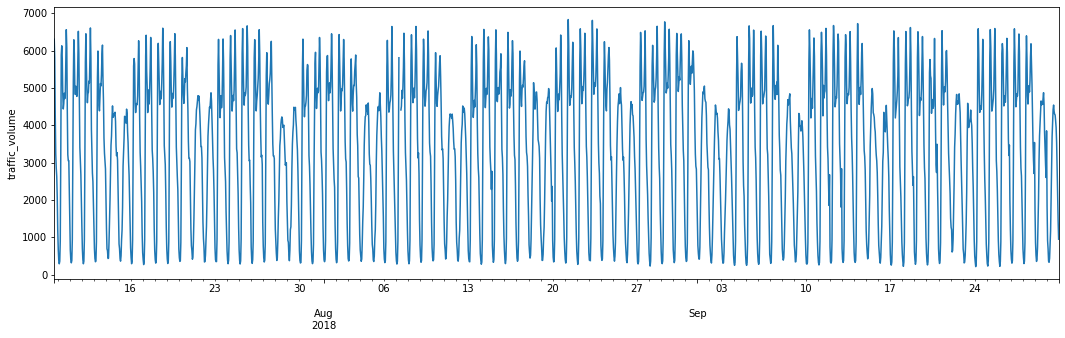

In [9]:
### PLOT TRAFFIC SAMPLE ###

df.traffic_volume.tail(2000).plot(figsize=(18,5))
plt.ylabel('traffic_volume')

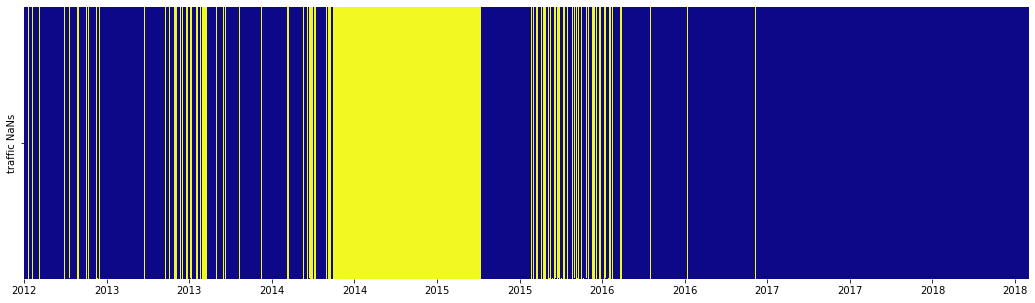

In [12]:
### PLOT MISSING VALUES OVER TIME ###

plt.figure(figsize=(18,5))
sns.heatmap(df[['traffic_volume']].isna().T, cbar=False, cmap='plasma', 
            xticklabels=False, yticklabels=['traffic NaNs'])
plt.xticks(range(0,len(df), 24*180), list(df.index.year[::24*180]))
np.set_printoptions(False)

In [14]:
# fill missing values
ddf = df[df.index.year.isin([2016,2017,2018])].copy()

df = pd.concat([df.select_dtypes(include=['object']).fillna(method='backfill'),
                df.select_dtypes(include=['float']).interpolate()], axis=1)

df.shape

(24096, 8)

In [32]:

# label encoding
map_col = dict()

X = df.select_dtypes(include=['object']).copy()
for i,cat in enumerate(X):
    X[cat] = df[cat].factorize()[0]
    map_col[cat] = i
X['month'] = df.index.month;  i += 1;  map_col['month'] = i
X['weekday'] = df.index.weekday;  i += 1;  map_col['weekday'] = i
X['hour'] = df.index.hour;  i += 1;  map_col['hour'] = i

,holiday,weather_main,weather_description,month,weekday,hour
2016-01-01 00:00:00,0,0,0,1,4,0
2016-01-01 01:00:00,1,1,1,1,4,1
2016-01-01 02:00:00,1,1,1,1,4,2
2016-01-01 03:00:00,1,1,1,1,4,3
2016-01-01 04:00:00,1,2,2,1,4,4
...,...,...,...,...,...,...
2018-09-30 19:00:00,1,2,4,9,6,19
2018-09-30 20:00:00,1,2,2,9,6,20
2018-09-30 21:00:00,1,8,16,9,6,21
2018-09-30 22:00:00,1,2,2,9,6,22


In [19]:
for i,cat in enumerate(X):
  print(cat)

  X[holiday]

holiday
weather_main
weather_description


In [26]:
df['weather_main'].factorize()

(array([0, 1, 1, ..., 8, 2, 2]),
 Index(['Haze', 'Snow', 'Clouds', 'Clear', 'Mist', 'Fog', 'Rain', 'Drizzle',
        'Thunderstorm', 'Smoke'],
       dtype='object'))

In [28]:
df['weather_main']

2016-01-01 00:00:00            Haze
2016-01-01 01:00:00            Snow
2016-01-01 02:00:00            Snow
2016-01-01 03:00:00            Snow
2016-01-01 04:00:00          Clouds
                           ...     
2018-09-30 19:00:00          Clouds
2018-09-30 20:00:00          Clouds
2018-09-30 21:00:00    Thunderstorm
2018-09-30 22:00:00          Clouds
2018-09-30 23:00:00          Clouds
Freq: H, Name: weather_main, Length: 24096, dtype: object